In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [4]:
test_data = pd.read_csv('主力合约2015年以来价格.csv')
test_data.describe()
test_data.columns


Index(['trade_date', 'ts_code', 'close', 'settle', 'vol', 'amount', 'oi'], dtype='object')

In [56]:
# Assign the y <- Prediction variable, and X <- Predicting features
# X is assigned 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'
features = ['vol', 'amount', 'oi']
# X = train_data[features]
# y = train_data.SalePrice

X = test_data[features]
y = test_data.close
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.33, random_state=1)
model = RandomForestRegressor(random_state=1,max_features=2,n_estimators=200)
model.fit(X_train, y_train)
preds = model.predict(X_test)

# preds

y_test = y_test.sort_index()
X_test = X_test.sort_index()
preds = model.predict(X_test)
a = list(y_test)



In [61]:
errors = abs(preds - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


mape = 100 * (errors / y_test) 
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 389.32 degrees.
Accuracy: 97.08 %.


In [69]:
from sklearn.tree import export_graphviz
import pydot
tree_small = model.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = features, rounded = True, precision = 1)
 
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
 
graph.write_png('small_tree.png');

/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lizhe/anaconda3/envs/stock/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 30495 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/lizhe/anaconda3/envs/stoc

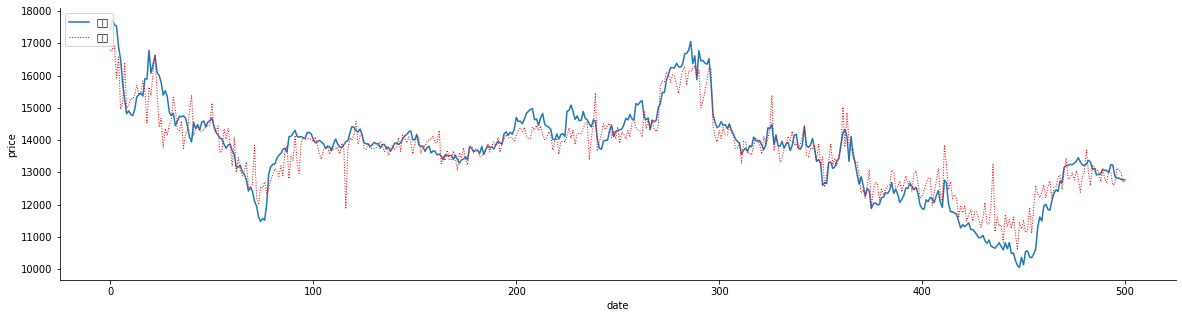

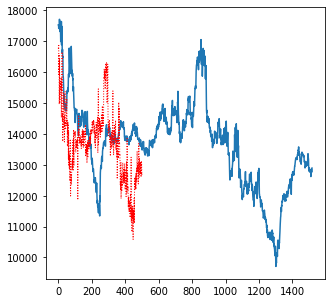

In [57]:
import matplotlib.pyplot as plt

plt.figure(num=3, figsize=(20, 5))

plt.plot( a,label='真实')
plt.plot( preds, color='red', linewidth=1.0, linestyle=':',label='预测')
# 添加图例要在线上加label 然后配合legend
plt.legend(loc='upper left')


plt.xlabel('date')
plt.ylabel('price')

# 让右边框和上边框消失
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


plt.figure(num=1, figsize=(5, 5))
plt.plot( test_data['close'],label='真实')
plt.plot( preds, color='red', linewidth=1.0, linestyle=':',label='预测')
plt.show()